In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

C:\Users\gabri\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
ticker = 'ITUB4.SA' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,ITUB4.SA
Date,
2020-07-10,0.009234
2020-07-13,-0.014815
2020-07-14,0.016652
2020-07-15,0.006948
2020-07-16,-0.008050


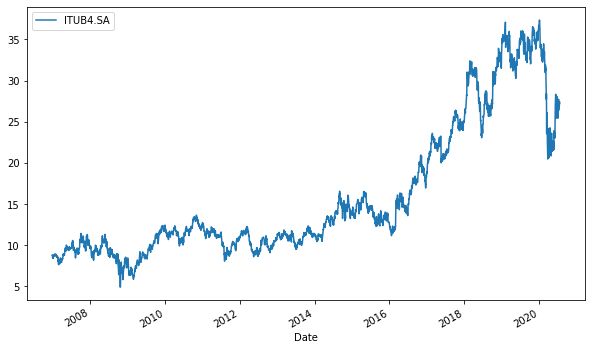

In [5]:
data.plot(figsize=(10, 6));

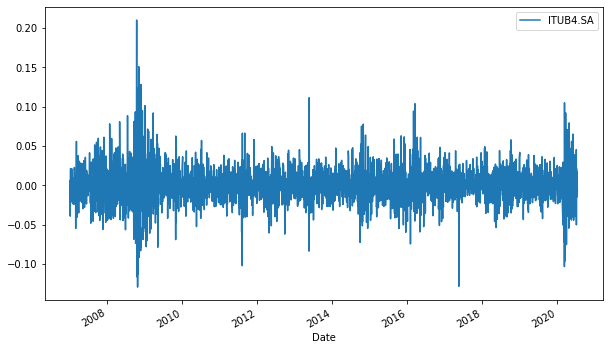

In [6]:
log_returns.plot(figsize = (10, 6))

In [7]:
u = log_returns.mean()
u

ITUB4.SA    0.00034
dtype: float64

In [8]:
var = log_returns.var()
var

ITUB4.SA    0.000527
dtype: float64

In [9]:
drift = u - (0.5 * var)
drift

ITUB4.SA    0.000076
dtype: float64

In [10]:
stdev = log_returns.std()
stdev

ITUB4.SA    0.022955
dtype: float64

******

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
np.array(drift)

array([7.61447421e-05])

In [14]:
drift.values

array([7.61447421e-05])

In [15]:
stdev.values

array([0.02295464])

In [16]:
norm.ppf(0.95)

1.6448536269514722

In [17]:
x = np.random.rand(10, 2)
x

array([[0.30226537, 0.26419742],
       [0.65980639, 0.24218919],
       [0.79685065, 0.38396148],
       [0.2084572 , 0.55700592],
       [0.80649808, 0.26915514],
       [0.13976627, 0.20075191],
       [0.77524595, 0.9345418 ],
       [0.50207946, 0.56845904],
       [0.39658109, 0.24525461],
       [0.54562133, 0.31856863]])

In [18]:
norm.ppf(x)

array([[-0.51789612, -0.63045819],
       [ 0.41193478, -0.6992779 ],
       [ 0.83042472, -0.29509284],
       [-0.81178606,  0.14338244],
       [ 0.86506369, -0.61537018],
       [-1.08137003, -0.83893851],
       [ 0.75623535,  1.51049799],
       [ 0.00521245,  0.17245236],
       [-0.26220658, -0.68949913],
       [ 0.11460611, -0.47170516]])

In [19]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.28329184, -0.45857824],
       [-0.34189579,  0.0788753 ],
       [ 0.79435349, -0.64079336],
       [ 0.21109608, -1.05828338],
       [-0.29616915, -0.96015126],
       [-1.35765992,  0.61525803],
       [ 1.98860818,  0.73220498],
       [-0.57222927, -0.86460948],
       [-1.10451199,  1.19031136],
       [ 0.70172598, -0.51297127]])

In [20]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [21]:
daily_returns

array([[1.00099622, 0.97004877, 0.99743732, ..., 1.01890421, 1.00039482,
        1.04749745],
       [0.99858711, 1.00833499, 1.03081319, ..., 1.00456415, 1.00167128,
        0.97834504],
       [0.98543601, 0.9987385 , 1.01260243, ..., 1.00244231, 1.00761088,
        0.99444656],
       ...,
       [1.04302857, 0.98913193, 1.03577173, ..., 0.98268699, 1.05632274,
        0.97005583],
       [0.99596763, 0.96798295, 1.03719766, ..., 1.01286616, 1.02024044,
        0.99217413],
       [1.03212288, 1.02656042, 0.99167182, ..., 0.98117468, 0.97270521,
        0.98032604]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [22]:
S0 = data.iloc[-1]
S0

ITUB4.SA    27.219999
Name: 2020-07-16 00:00:00, dtype: float64

In [23]:
price_list = np.zeros_like(daily_returns)

In [24]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
price_list[0] = S0
price_list

array([[27.21999931, 27.21999931, 27.21999931, ..., 27.21999931,
        27.21999931, 27.21999931],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [31]:
price_list

array([[ 27.21999931,  27.21999931,  27.21999931, ...,  27.21999931,
         27.21999931,  27.21999931],
       [ 27.18154039,  27.4468776 ,  28.05873425, ...,  27.34423539,
         27.26549153,  26.6305513 ],
       [ 26.78566878,  27.41225325,  28.4123425 , ...,  27.41101858,
         27.47300596,  26.48266004],
       ...,
       [ 15.04560191,  32.76411203,  48.34249692, ..., 102.51982344,
         45.22907226,   9.58760962],
       [ 14.9849325 ,  31.71510181,  50.1407248 , ..., 103.83885948,
         46.1445286 ,   9.51257821],
       [ 15.46629167,  32.55746823,  49.72314366, ..., 101.88405979,
         44.88502354,   9.32542811]])

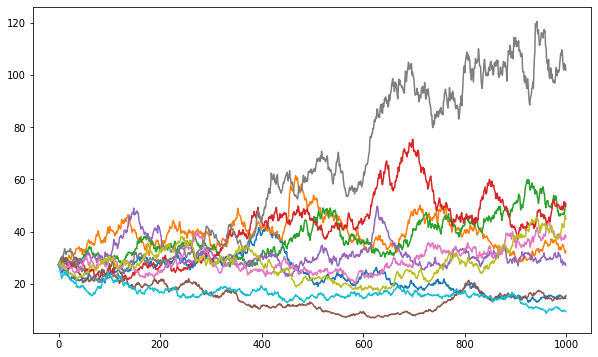

In [32]:
plt.figure(figsize=(10,6))
plt.plot(price_list);